<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/2.%20%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/%D0%A0%D0%B5%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%B0_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Модель кластеризации KMeans

# Алгоритм K-means (K-средних)<a class='anchor' id='kmeans'>

## Содержание

1. Познакомимся с моделью KMeans
2. Реализуем функцию для обучения модели KMeans
3. Сделаем критерий останова для KMeans
4. Обсудим проблему начальной инициализации центроид в KMeans
5. Визуализируем работу модели
6. Посмотрим на реализацию в sklearn

Вначале сгенерируем три облака точек с помощью `sklearn`.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, random_state=10)

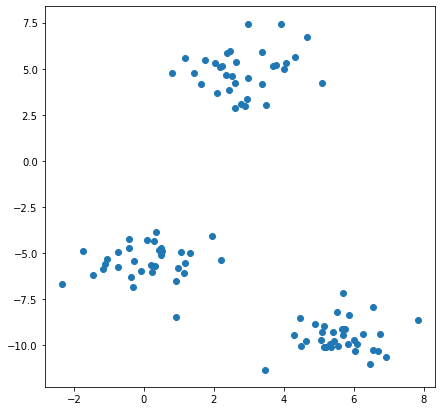

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

### Инициализируем центроиды

Алгоритм построения:

1. Выбрать количество кластеров $k$, на которые будут делиться данные.


In [ ]:
k = 3

2. Случайным образом выбрать в пространстве данных $k$ точек $c_{k}$ (центроидов) - центров будущих кластеров.



In [ ]:
np.random.seed(0)
centroid_ids = np.random.choice(X.shape[0], k, replace=False)
centroid_ids

array([26, 86,  2])

In [ ]:
centroids = X[centroid_ids]
centroids

array([[ 2.52859794,  4.5759393 ],
       [-1.45074027, -6.18301386],
       [ 2.44301805,  3.84652646]])

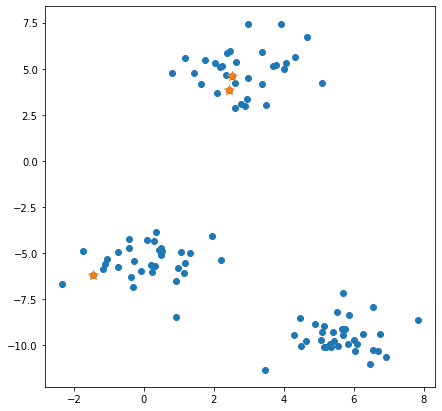

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100);


3. Для каждой точки из выборки посчитать, к какому из центроидов она ближе.

В качестве метрики расстояния будем использовать евклидово расстояние

$$\sqrt{\sum{(x_1 - x_2)^2}}$$

In [ ]:
colors = ['green', 'orange', 'red']

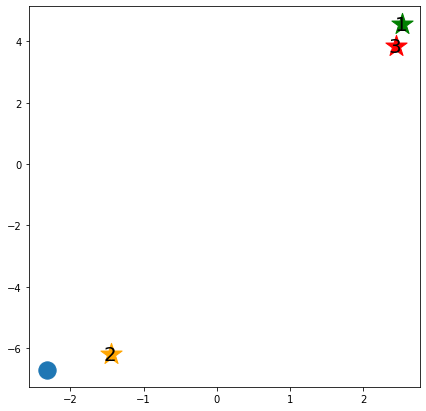

In [ ]:
idx_1 = 0
plt.figure(figsize=(7, 7))
plt.scatter(X[idx_1, 0], X[idx_1, 1], s=300)

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [ ]:
np.linalg.norm(centroids - X[idx_1], axis=1)

array([12.27614681,  1.01564584, 11.5742295 ])

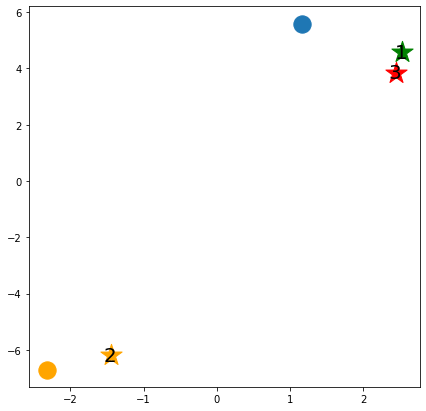

In [ ]:
idx_2 = 11

plt.figure(figsize=(7, 7))
plt.scatter(X[idx_1, 0], X[idx_1, 1], s=300, c=colors[1])
plt.scatter(X[idx_2, 0], X[idx_2, 1], s=300)

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [ ]:
np.linalg.norm(centroids - X[idx_2], axis=1)

array([ 1.70360812, 12.06653963,  2.16731949])

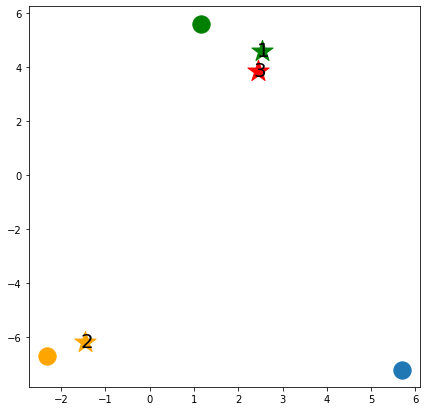

In [ ]:
idx_3 = 9

plt.figure(figsize=(7, 7))
plt.scatter(X[idx_1, 0], X[idx_1, 1], s=300, c=colors[1])
plt.scatter(X[idx_2, 0], X[idx_2, 1], s=300, c=colors[0])
plt.scatter(X[idx_3, 0], X[idx_3, 1], s=300)

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [ ]:
np.linalg.norm(centroids - X[idx_3], axis=1)

array([12.1935543 ,  7.21525378, 11.51453993])

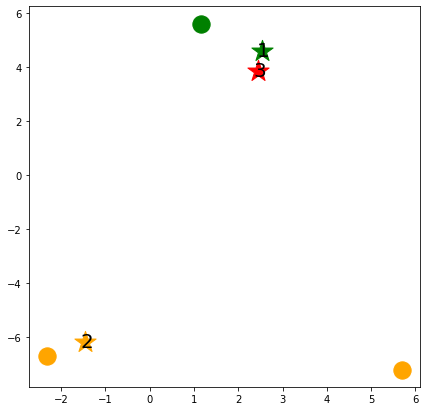

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[idx_1, 0], X[idx_1, 1], s=300, c=colors[1])
plt.scatter(X[idx_2, 0], X[idx_2, 1], s=300, c=colors[0])
plt.scatter(X[idx_3, 0], X[idx_3, 1], s=300, c=colors[1])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

#### Первая итерация обучения

Создадим словарь для кластеризации

In [ ]:
clusters = {i: [] for i in range(k)}
clusters

{0: [], 1: [], 2: []}

In [ ]:
for x in X:
    distances = np.linalg.norm(centroids - x, axis=1)
    cluster_ind = distances.argmin()
    clusters[cluster_ind].append(x)

clusters

{0: [array([2.03300209, 5.28990817]),
  array([3.37979515, 4.18880872]),
  array([3.78067293, 5.22062163]),
  array([1.16464321, 5.59667831]),
  array([4.32968132, 5.64396726]),
  array([2.61105267, 4.22218469]),
  array([0.81677922, 4.75330395]),
  array([2.52859794, 4.5759393 ]),
  array([3.69548081, 5.14288792]),
  array([2.37698085, 5.82428626]),
  array([1.44712872, 4.75428451]),
  array([2.96590542, 4.5052704 ]),
  array([2.45717481, 5.96515011]),
  array([4.05619693, 5.32231077]),
  array([3.90917002, 7.44140273]),
  array([2.62413419, 5.36941887]),
  array([2.98771848, 7.44372871]),
  array([5.0772903 , 4.23672091]),
  array([4.65804929, 6.7208918 ]),
  array([2.36013594, 4.62719573]),
  array([2.23393846, 5.11718182]),
  array([4.01289101, 5.00538736]),
  array([1.75005543, 5.44582908]),
  array([3.38492372, 5.8943468 ]),
  array([2.19087156, 5.06566526])],
 1: [array([-2.32496308, -6.6999964 ]),
  array([ 0.51856831, -4.90086804]),
  array([ 5.82662285, -9.92259335]),
  array

In [ ]:
len(clusters[0]), len(clusters[1]), len(clusters[2])

(25, 67, 8)

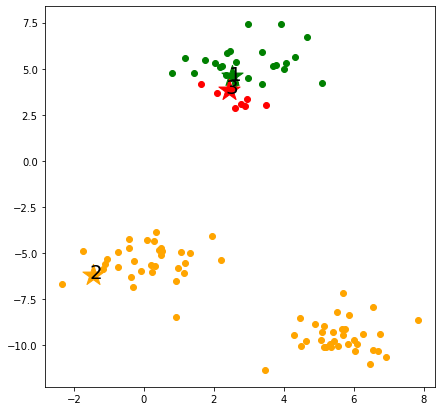

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);


4. Переместить каждый центроид в центр выборки, отнесенной к этому центроиду, определив его как среднее арифметическое всех точек кластера:

$$c_{k} = \frac{\sum_{i=1}^{l}[a(x_{i})=k]x_{i}}{\sum_{i=1}^{l}[a(x_{i}) = k]}.$$


Пересчитаем центроиды как среднее по кластерам


In [ ]:
centroids

array([[ 2.52859794,  4.5759393 ],
       [-1.45074027, -6.18301386],
       [ 2.44301805,  3.84652646]])

In [ ]:
new_centroids = {}
for cluster in clusters:
    new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

new_centroids

{0: array([2.91329082, 5.33493484]),
 1: array([ 2.89504171, -7.53408753]),
 2: array([2.61305824, 3.369246  ])}

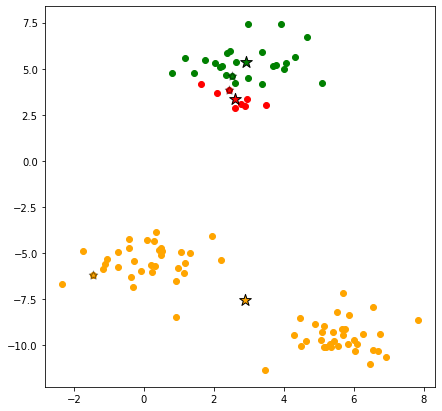

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], s=80, c=colors[i], marker='*', alpha=0.5, edgecolors='black')

for i in new_centroids:
    plt.scatter(new_centroids[i][0], new_centroids[i][1], marker='*', s=150, c=colors[i], edgecolors='black')

#### Вторая итерация обучения


5. Повторить шаги 3-4 до сходимости алгоритма (обычно это оценивается по величине смещения центроида после каждого шага - сходимость означает непревышение смещения какого-то заданного значения).

In [ ]:
new_centroids = dict(sorted(new_centroids.items()))
new_centroids = np.array(list(new_centroids.values()))
centroids = new_centroids.copy()
centroids

array([[ 2.91329082,  5.33493484],
       [ 2.89504171, -7.53408753],
       [ 2.61305824,  3.369246  ]])

In [ ]:
clusters = {i: [] for i in range(k)}
clusters

{0: [], 1: [], 2: []}

In [ ]:
for x in X:
    distances = np.linalg.norm(centroids - x, axis=1)
    cluster_ind = distances.argmin()
    clusters[cluster_ind].append(x)

clusters

{0: [array([2.03300209, 5.28990817]),
  array([3.78067293, 5.22062163]),
  array([1.16464321, 5.59667831]),
  array([4.32968132, 5.64396726]),
  array([0.81677922, 4.75330395]),
  array([2.52859794, 4.5759393 ]),
  array([3.69548081, 5.14288792]),
  array([2.37698085, 5.82428626]),
  array([1.44712872, 4.75428451]),
  array([2.96590542, 4.5052704 ]),
  array([2.45717481, 5.96515011]),
  array([4.05619693, 5.32231077]),
  array([3.90917002, 7.44140273]),
  array([2.62413419, 5.36941887]),
  array([2.98771848, 7.44372871]),
  array([5.0772903 , 4.23672091]),
  array([4.65804929, 6.7208918 ]),
  array([2.36013594, 4.62719573]),
  array([2.23393846, 5.11718182]),
  array([4.01289101, 5.00538736]),
  array([1.75005543, 5.44582908]),
  array([3.38492372, 5.8943468 ]),
  array([2.19087156, 5.06566526])],
 1: [array([-2.32496308, -6.6999964 ]),
  array([ 0.51856831, -4.90086804]),
  array([ 5.82662285, -9.92259335]),
  array([  6.04774884, -10.30504657]),
  array([-0.42084194, -4.24889336]),
 

In [ ]:
len(clusters[0]), len(clusters[1]), len(clusters[2])

(23, 67, 10)

In [ ]:
new_centroids = {}
for cluster in clusters:
    new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

new_centroids

{0: array([2.90614881, 5.43314686]),
 1: array([ 2.89504171, -7.53408753]),
 2: array([2.68953138, 3.53649614])}

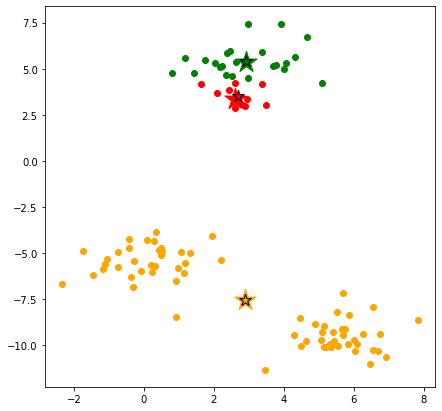

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])

for i in new_centroids:
    plt.scatter(new_centroids[i][0], new_centroids[i][1], marker='*', s=150, c=colors[i], edgecolors='black')

### Функция для обучения KMeans

In [ ]:
from tqdm import tqdm

def KMeans(X, k=3, num_iter=10):
    np.random.seed(0)
    centroid_ids = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[centroid_ids]

    for i in tqdm(range(num_iter)):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))
        centroids = new_centroids.copy()

    return centroids, clusters

In [ ]:
centroids, clusters = KMeans(X)
centroids

100%|██████████| 10/10 [00:00<00:00, 525.94it/s]


array([[ 2.90614881,  5.43314686],
       [ 2.89504171, -7.53408753],
       [ 2.68953138,  3.53649614]])

In [ ]:
clusters

{0: [array([2.03300209, 5.28990817]),
  array([3.78067293, 5.22062163]),
  array([1.16464321, 5.59667831]),
  array([4.32968132, 5.64396726]),
  array([0.81677922, 4.75330395]),
  array([2.52859794, 4.5759393 ]),
  array([3.69548081, 5.14288792]),
  array([2.37698085, 5.82428626]),
  array([1.44712872, 4.75428451]),
  array([2.96590542, 4.5052704 ]),
  array([2.45717481, 5.96515011]),
  array([4.05619693, 5.32231077]),
  array([3.90917002, 7.44140273]),
  array([2.62413419, 5.36941887]),
  array([2.98771848, 7.44372871]),
  array([5.0772903 , 4.23672091]),
  array([4.65804929, 6.7208918 ]),
  array([2.36013594, 4.62719573]),
  array([2.23393846, 5.11718182]),
  array([4.01289101, 5.00538736]),
  array([1.75005543, 5.44582908]),
  array([3.38492372, 5.8943468 ]),
  array([2.19087156, 5.06566526])],
 1: [array([-2.32496308, -6.6999964 ]),
  array([ 0.51856831, -4.90086804]),
  array([ 5.82662285, -9.92259335]),
  array([  6.04774884, -10.30504657]),
  array([-0.42084194, -4.24889336]),
 

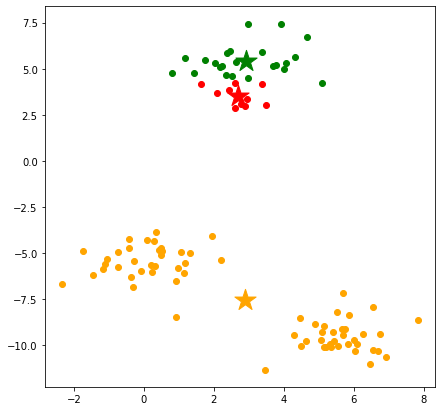

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])

### Функция для обучения KMeans с критерием останова

In [ ]:
def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0):
    np.random.seed(seed)
    centroid_ids = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[centroid_ids]

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        print(len(clusters[0]), len(clusters[1]), len(clusters[2]))
        print(new_centroids)

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

In [ ]:
centroids, clusters = KMeans(X)
centroids

25 67 8
[[ 2.91329082  5.33493484]
 [ 2.89504171 -7.53408753]
 [ 2.61305824  3.369246  ]]
23 67 10
[[ 2.90614881  5.43314686]
 [ 2.89504171 -7.53408753]
 [ 2.68953138  3.53649614]]
23 67 10
[[ 2.90614881  5.43314686]
 [ 2.89504171 -7.53408753]
 [ 2.68953138  3.53649614]]
stopping at iter 2


array([[ 2.90614881,  5.43314686],
       [ 2.89504171, -7.53408753],
       [ 2.68953138,  3.53649614]])

In [ ]:
centr1 = np.array([[ 2.91329082,  5.33493484],
                   [ 2.89504171, -7.53408753],
                   [ 2.61305824,  3.369246  ]])
centr2 = np.array([[ 2.90614881,  5.43314686],
                   [ 2.89504171, -7.53408753],
                   [ 2.68953138,  3.53649614]])
centr3 = np.array([[ 2.90614881,  5.43314686],
                   [ 2.89504171, -7.53408753],
                   [ 2.68953138,  3.53649614]])

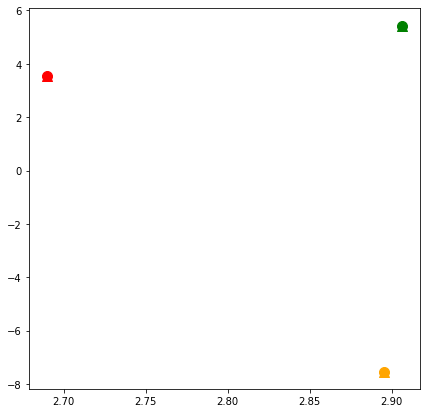

In [ ]:
plt.figure(figsize=(7, 7))

for i, centr in enumerate(centr1):
    # plt.scatter(centr1[i][0], centr1[i][1], marker='*', s=100, c=colors[i])
    plt.scatter(centr2[i][0], centr2[i][1], marker='^', s=100, c=colors[i])
    plt.scatter(centr3[i][0], centr3[i][1], marker='o', s=100, c=colors[i])

In [ ]:
np.linalg.norm(centr2[0] - centr3[0])

0.0

Поменяем seed для другой инициализации стартовых центроид

In [ ]:
centroids, clusters = KMeans(X, seed=1)
centroids

26 66 8
[[  5.29660654  -9.38045292]
 [  1.46485965  -0.3030066 ]
 [  6.66400306 -10.07078922]]
29 61 10
[[ 4.49298218 -8.90049529]
 [ 1.50550525  0.21865431]
 [ 6.55722276 -9.96800753]]
33 48 19
[[ 2.34915724 -7.50785928]
 [ 1.95733764  1.86223045]
 [ 6.11737555 -9.79390688]]
33 33 34
[[ 0.08921213 -5.46441742]
 [ 2.84050716  4.85840422]
 [ 5.6183469  -9.54288499]]
33 33 34
[[ 0.08921213 -5.46441742]
 [ 2.84050716  4.85840422]
 [ 5.6183469  -9.54288499]]
stopping at iter 4


array([[ 0.08921213, -5.46441742],
       [ 2.84050716,  4.85840422],
       [ 5.6183469 , -9.54288499]])

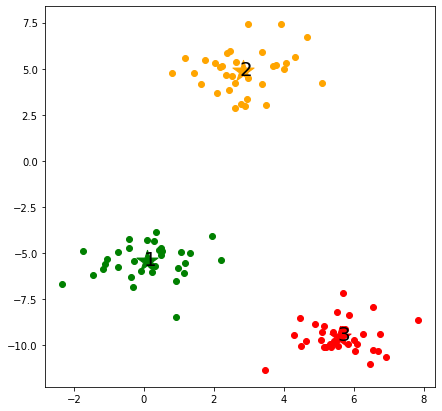

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

Хотелось бы не перебирать случайность, пока не повезет, а иметь другой более умный способ инициализации центроид - это KMeans++

## KMeans в sklearn

In [ ]:
from sklearn.cluster import KMeans as sk_KMeans

model = sk_KMeans(n_clusters=3,
                  init='k-means++',
                  max_iter=10,
                  random_state=0)

model.fit(X)

KMeans(max_iter=10, n_clusters=3, random_state=0)

In [ ]:
labels = model.predict(X)
labels[:10]

array([1, 1, 0, 2, 0, 0, 2, 1, 0, 2], dtype=int32)

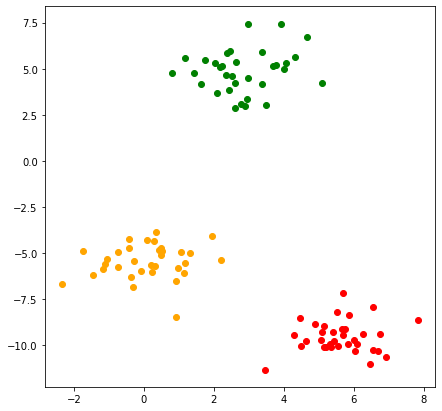

In [ ]:
plt.figure(figsize=(7, 7))

for i in range(len(labels)):
    plt.scatter(X[i, 0], X[i, 1], color=colors[labels[i]])

In [ ]:
model.cluster_centers_

array([[ 2.84050716,  4.85840422],
       [ 0.08921213, -5.46441742],
       [ 5.6183469 , -9.54288499]])

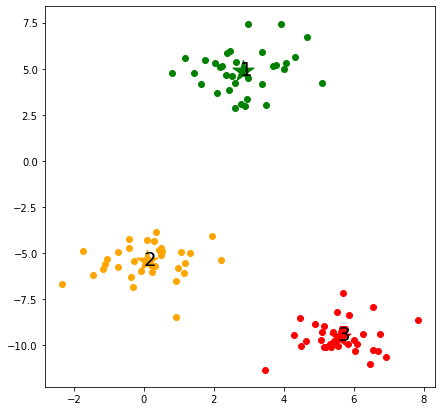

In [ ]:
plt.figure(figsize=(7, 7))

for i in range(len(labels)):
    plt.scatter(X[i, 0], X[i, 1], color=colors[labels[i]])

for i, centr in enumerate(model.cluster_centers_):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

## Выводы:

Вот мы и разобрались, как можно обучить модель KMeans, а именно
1. Реализовали функцию для обучения модели
2. Сделали критерий останова для KMeans
3. Обсудили проблему начальной инициализации центроид в KMeans
4. Визуализировали работу модели
5. Посмотрели на реализацию в sklearn

# Инициализация центроид KMeans++

## Содержание

1. Поймем проблему случайной инициализации центроид
2. Реализуем выбор стартовых центроид, как самых удаленных точек
3. Попробуем KMeans++ из sklearn
3. Сделаем реализацию KMeans++ из статьи  

## Инициализация центроид KMeans++

### Инициализация случайная

Вначале сгенерируем три облака точек с помощью `sklearn`.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, random_state=10)

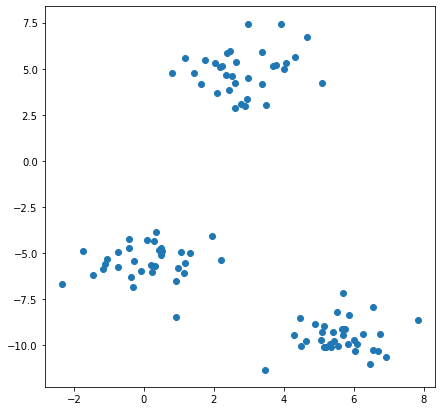

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

Инициализируем центроиды

In [ ]:
k = 3

In [ ]:
np.random.seed(0)
centroid_ids = np.random.choice(X.shape[0], k, replace=False)
centroid_ids

array([26, 86,  2])

In [ ]:
centroids = X[centroid_ids]
centroids

array([[ 2.52859794,  4.5759393 ],
       [-1.45074027, -6.18301386],
       [ 2.44301805,  3.84652646]])

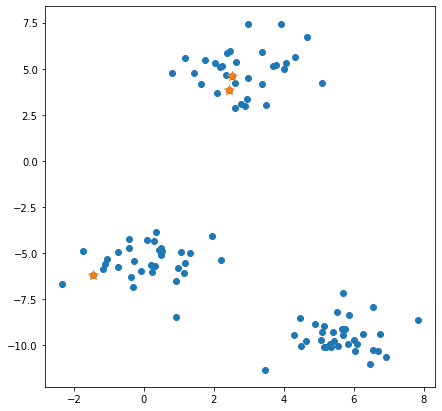

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100);

In [ ]:
colors = ['green', 'orange', 'red']

### Функция для обучения KMeans

In [ ]:
def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0):
    np.random.seed(seed)
    centroid_ids = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[centroid_ids]

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

In [ ]:
centroids, clusters = KMeans(X)
centroids

stopping at iter 2


array([[ 2.90614881,  5.43314686],
       [ 2.89504171, -7.53408753],
       [ 2.68953138,  3.53649614]])

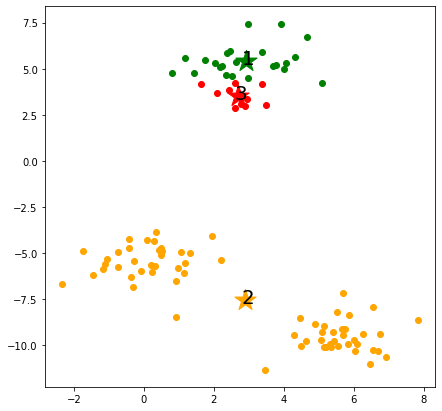

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

### Инициализация KMeans++ из sklearn

In [ ]:
from sklearn.cluster import kmeans_plusplus

centroids_pp, centroids_ids = kmeans_plusplus(X, n_clusters=3, random_state=0)
centroids_pp, centroids_ids

(array([[ 4.05619693,  5.32231077],
        [ 1.13730861, -6.0760439 ],
        [ 5.99156553, -9.73238127]]), array([44, 64, 46]))

In [ ]:
X[centroids_ids]

array([[ 4.05619693,  5.32231077],
       [ 1.13730861, -6.0760439 ],
       [ 5.99156553, -9.73238127]])

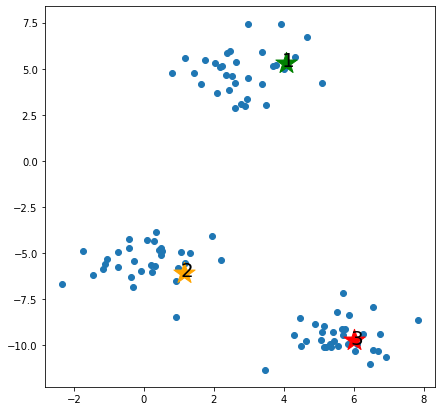

In [ ]:
plt.figure(figsize=(7, 7))

plt.scatter(X[:, 0], X[:, 1])

for i, centr in enumerate(centroids_pp):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

### Самостоятельная реализация KMeans++

In [ ]:
def plot_data(X, centroids):
    plt.figure(figsize=(7, 7))

    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1], marker='*', label='предыдущие центроиды')
    plt.scatter(centroids[-1, 0], centroids[-1, 1], marker='*', label='следующая центроида', s=200, edgecolors='black')

    plt.legend()
    plt.show()

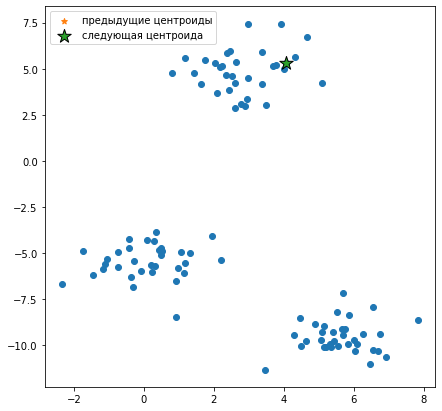

In [ ]:
centroids = []
centroids.append(X[centroids_ids[0]])
plot_data(X, np.array(centroids))

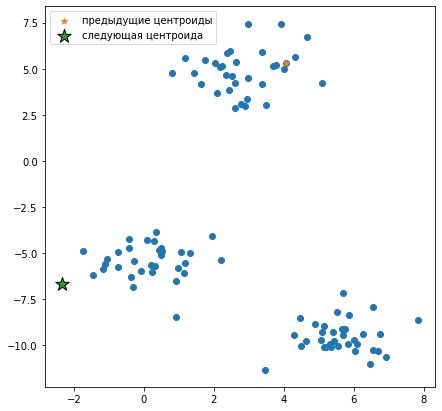

In [ ]:
for x in X:
    distances = np.linalg.norm(centroids - x, axis=1)
    obj_ind = distances.argmax()

next_centroid = X[obj_ind]
centroids.append(next_centroid)

plot_data(X, np.array(centroids))

In [ ]:
dists = []

for x in X:
    distances = np.linalg.norm(centroids - x, axis=1)
    dists.append(distances.min())

dists[:10]

[0.0,
 3.3648972729747024,
 2.1863863808352844,
 8.76547114399139,
 2.0234542899343846,
 1.3199796359180924,
 9.11584837953402,
 3.103801452730353,
 0.2936905729075689,
 8.033021812744863]

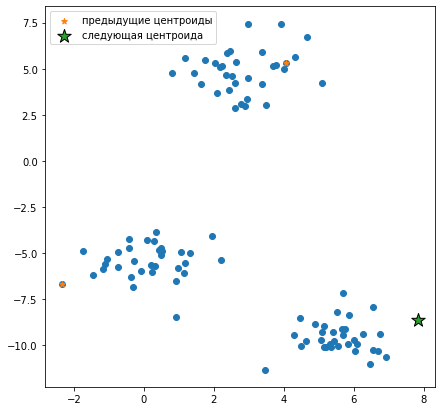

In [ ]:
obj_ind = np.array(dists).argmax()
next_centroid = X[obj_ind]
centroids.append(next_centroid)

plot_data(X, np.array(centroids))

In [ ]:
centroids

[array([4.05619693, 5.32231077]),
 array([-2.32496308, -6.6999964 ]),
 array([ 7.82111653, -8.66750208])]

### Функция для инициализации KMeans++

In [ ]:
def kmeanspp(X, k=3, seed=0):
    centroids = []

    np.random.seed(seed)
    centroid_id = np.random.choice(X.shape[0])
    centroids.append(X[centroid_id])

    plot_data(X, np.array(centroids))


    for _ in range(k-1):
        dists = []
        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            dists.append(distances.min())

        obj_ind = np.array(dists).argmax()
        next_centroid = X[obj_ind]
        centroids.append(next_centroid)

        plot_data(X, np.array(centroids))

    return centroids

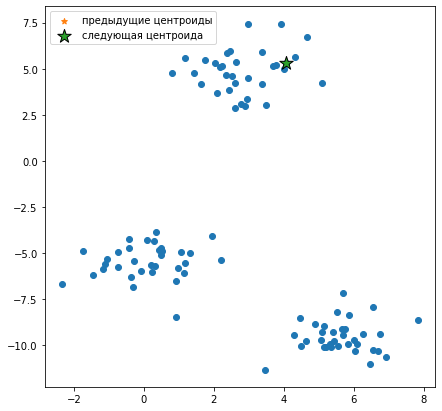

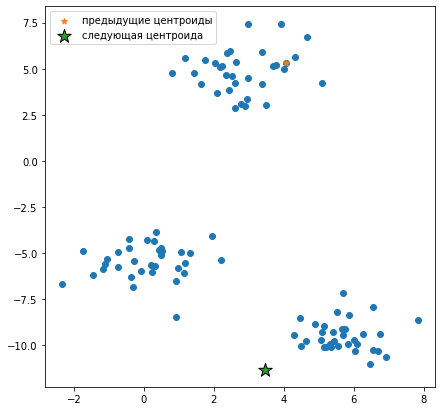

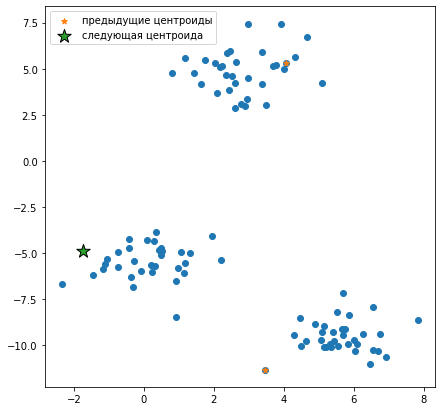

In [ ]:
centroids = kmeanspp(X, k=3)

In [ ]:
centroids

[array([4.05619693, 5.32231077]),
 array([  3.44868458, -11.32833331]),
 array([-1.74093095, -4.89176978])]

In [ ]:
def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0, centroids=None):
    if centroids is None:
        np.random.seed(seed)
        centroid_ids = np.random.choice(X.shape[0], k, replace=False)
        centroids = X[centroid_ids]

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

In [ ]:
centroids, clusters = KMeans(X, centroids=centroids)

stopping at iter 2


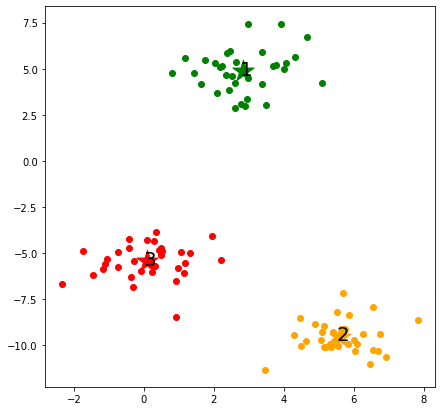

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

### KMeans++ из оригинальной [статьи](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)



In [ ]:
centroids = np.empty((k, X.shape[1]))
centroids[0] = X[centroids_ids[0]]
centroids

array([[ 4.05619693,  5.32231077],
       [17.2       , 17.2       ],
       [17.2       , 17.2       ]])


In particular, let D(x) denote the shortest distance from a data point to the closest center we have already chosen.
Then, we define the following algorithm, which we call k-means++.


1.   Take one center c1, chosen uniformly at random from X .
2.   Take a new center ci, choosing x ∈ X with probability $\frac{D(x)^2}{\sum{D(x)^2}}$


In [ ]:
distances = []
for x in X:
    distances.append(np.linalg.norm(centroids[0] - x))

distances = np.array(distances) ** 2
distances[:10]

array([1.85255073e+02, 1.17028201e+02, 4.78028541e+00, 2.35541509e+02,
       4.09436726e+00, 1.74234624e+00, 2.48180576e+02, 1.11651825e+02,
       8.62541526e-02, 1.59485541e+02])

In [ ]:
sum_dist = distances.sum()
sum_dist

12197.31232118332

In [ ]:
np.set_printoptions(suppress=True)

proba = distances / sum_dist
proba

array([0.01518819, 0.00959459, 0.00039191, 0.01931094, 0.00033568,
       0.00014285, 0.02034715, 0.00915381, 0.00000707, 0.01307547,
       0.01968649, 0.00069166, 0.00041755, 0.01038445, 0.01374238,
       0.00001461, 0.01789497, 0.00045935, 0.01924511, 0.00027045,
       0.01658597, 0.007574  , 0.00054152, 0.0093696 , 0.01513936,
       0.00088688, 0.00023699, 0.00001331, 0.00025184, 0.01817432,
       0.01231782, 0.00058455, 0.00015219, 0.0206181 , 0.00992597,
       0.00808472, 0.01091664, 0.00024351, 0.00067556, 0.00056062,
       0.01130857, 0.01566392, 0.01201703, 0.01173662, 0.        ,
       0.01958695, 0.01888854, 0.015806  , 0.01146839, 0.02162249,
       0.00036993, 0.00968658, 0.02276018, 0.01487012, 0.01188317,
       0.01720785, 0.00016832, 0.00993616, 0.01942507, 0.01860178,
       0.00046257, 0.0001821 , 0.01253669, 0.00887408, 0.01135024,
       0.02047694, 0.01735707, 0.00936869, 0.01266685, 0.00885553,
       0.00019006, 0.01833403, 0.00027545, 0.00027569, 0.01113

In [ ]:
proba.argmax()

52

In [ ]:
proba[52]

0.022760179623509538

In [ ]:
ind = np.random.choice(list(range(X.shape[0])), size=1, p=proba)
ind

array([90])

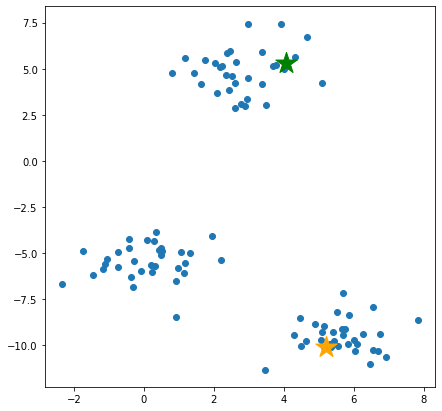

In [ ]:
plt.figure(figsize=(7, 7))

plt.scatter(X[:, 0], X[:, 1])

plt.scatter(centroids[0, 0], centroids[0, 1], marker='*', s=500, c=colors[0])
plt.scatter(X[ind, 0], X[ind, 1], marker='*', s=500, c=colors[1]);

In [ ]:
centroids[1] = X[ind]
centroids

array([[  4.05619693,   5.32231077],
       [  5.19423061, -10.08668991],
       [ 17.2       ,  17.2       ]])

Третья центроида

In [ ]:
distances = []
for x in X:
    distances.append(min(np.linalg.norm(centroids - x, axis=1)))

distances = np.array(distances) ** 2
distances[:10]

array([68.00796672, 48.75456642,  4.78028541,  0.42684763,  4.09436726,
        1.74234624,  0.776173  , 65.60890834,  0.08625415,  8.5812706 ])

In [ ]:
sum_dist = distances.sum()
sum_dist

1823.4872426534132

In [ ]:
proba = distances / sum_dist
proba

array([0.03729555, 0.02673699, 0.00262151, 0.00023408, 0.00224535,
       0.0009555 , 0.00042565, 0.03597991, 0.0000473 , 0.00470597,
       0.00000192, 0.0046265 , 0.00279298, 0.02003478, 0.0223576 ,
       0.00009776, 0.00067101, 0.00307259, 0.00001856, 0.00180902,
       0.00085469, 0.02569119, 0.00362224, 0.02238459, 0.00203935,
       0.00593237, 0.00158522, 0.00008901, 0.00168454, 0.00034008,
       0.01698298, 0.00391003, 0.00101799, 0.00124438, 0.03316263,
       0.03394056, 0.01983762, 0.00162881, 0.00451884, 0.00374997,
       0.04117586, 0.00183644, 0.03269853, 0.0225107 , 0.        ,
       0.00007338, 0.00041748, 0.00157831, 0.03375088, 0.00179946,
       0.00247447, 0.01704558, 0.00251639, 0.0036009 , 0.02446983,
       0.00488878, 0.00112588, 0.02587631, 0.00044923, 0.00008843,
       0.0030941 , 0.00121807, 0.03173898, 0.03256851, 0.01784707,
       0.00103685, 0.00060812, 0.02762326, 0.02481828, 0.03105041,
       0.00127133, 0.00156791, 0.00184252, 0.00184411, 0.02424

In [ ]:
proba.argmax()

40

In [ ]:
ind = np.random.choice(list(range(X.shape[0])), size=1, p=proba)
ind

array([40])

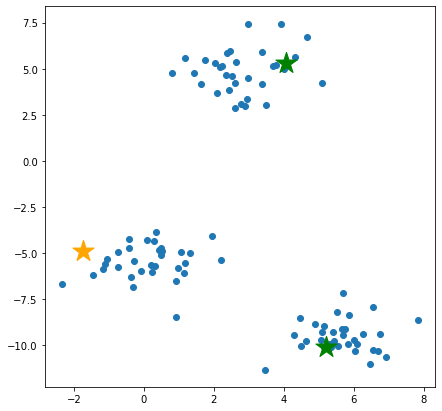

In [ ]:
plt.figure(figsize=(7, 7))

plt.scatter(X[:, 0], X[:, 1])

plt.scatter(centroids[0, 0], centroids[0, 1], marker='*', s=500, c=colors[0])
plt.scatter(centroids[1, 0], centroids[1, 1], marker='*', s=500, c=colors[0])
plt.scatter(X[ind, 0], X[ind, 1], marker='*', s=500, c=colors[1]);

### Функция для обучения KMeans с инициализацией KMeans++

In [ ]:
def kmeanspp(X, k=3, seed=0):
    centroids = []

    np.random.seed(seed)
    centroid_id = np.random.choice(X.shape[0])
    centroids.append(X[centroid_id])

    for _ in range(k-1):
        dists = []
        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            dists.append(distances.min())

        obj_ind = np.array(dists).argmax()
        next_centroid = X[obj_ind]
        centroids.append(next_centroid)

    return centroids

In [ ]:
def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0, centroids=None):
    if centroids is None:
        centroids = kmeanspp(X, k=k, seed=seed)

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

Сделаем задачу посложнее

In [ ]:
X, y = make_blobs(n_samples=300, random_state=13, cluster_std=1.5)

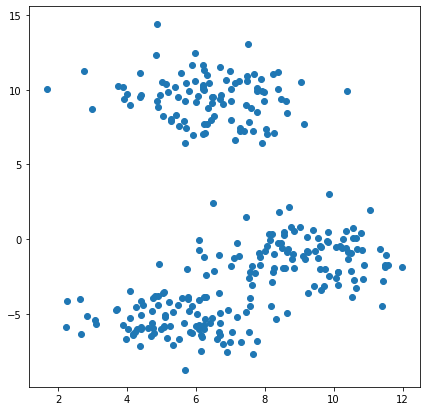

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

In [ ]:
centroids, clusters = KMeans(X)

stopping at iter 3


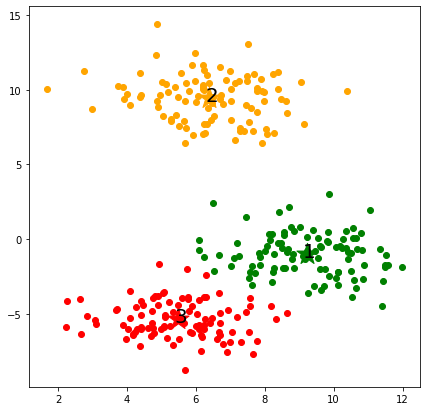

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

Сравним кластеры с настоящими метками классов

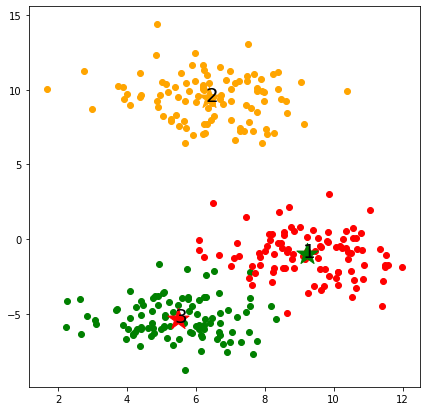

In [ ]:
plt.figure(figsize=(7, 7))

for i in range(k):
    temp = X[y == i]
    plt.scatter(temp[:,0], temp[:,1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

## Итоги:

Вот мы и разобрались, как устроен KMeans++, а именно
1. Поняли проблему случайной инициализации центроид
2. Реализовали выбор стартовых центроид, как самых удаленных точек
3. Попробовали KMeans++ из sklearn
3. Сделали реализацию KMeans++ из статьи  

# Метод локтя

Вначале сгенерируем три облака точек с помощью `sklearn`.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, random_state=16)

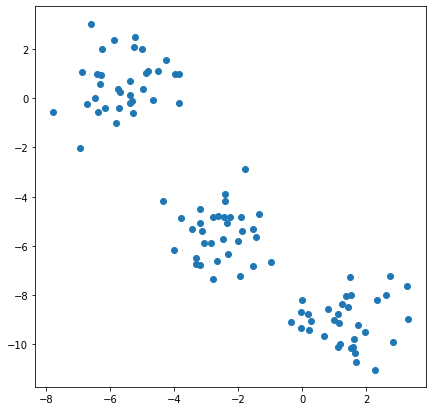

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

Посчитаем центроиду для одного кластера

In [ ]:
centroid = np.mean(X, axis=0)
centroid

array([-2.29768256, -4.59342859])

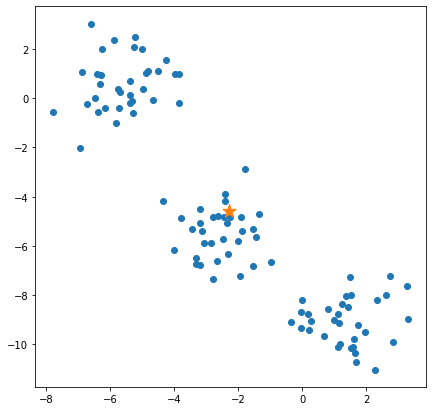

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroid[0], centroid[1], marker='*', s=200);

Посчитаем внутрикластерное расстояние


$$\sum\rho^{2}(x_{i}, c)$$



In [ ]:
dists = 0
for x in X:
    dists += np.linalg.norm(x - centroid) ** 2

dists

2588.7486419573993

inertia_ : float
    Sum of squared distances of samples to their closest cluster center,
weighted by the sample weights if provided.

In [ ]:
from sklearn.cluster import KMeans as sk_KMeans

km = sk_KMeans(n_clusters=1).fit(X)
km.inertia_

2588.7486419573984

Сделаем два кластера

In [ ]:
def kmeanspp(X, k=3, seed=0):
    centroids = []

    np.random.seed(seed)
    centroid_id = np.random.choice(X.shape[0])
    centroids.append(X[centroid_id])

    for _ in range(k-1):
        dists = []
        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            dists.append(distances.min())

        obj_ind = np.array(dists).argmax()
        next_centroid = X[obj_ind]
        centroids.append(next_centroid)

    return centroids

In [ ]:
def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0, centroids=None):
    if centroids is None:
        centroids = kmeanspp(X, k=k, seed=seed)

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

In [ ]:
centroids, clusters = KMeans(X, k=2)

stopping at iter 1


In [ ]:
colors = ['green', 'orange', 'red', 'navy', 'pink', 'yellow', 'black']

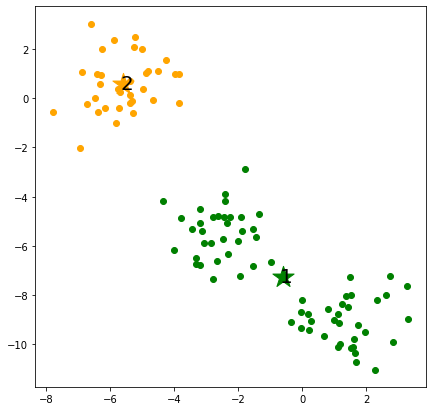

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);


$$\sum_{k=1}^{K}\sum_{i=1}^{l}[a(x_{i})=k]\rho^{2}(x_{i}, c_{k})$$



 $$\sum_{k=1}^{K}\frac{1}{|k|}\sum_{i=1}^{l}[a(x_{i})=k]\rho^{2}(x_{i}, c_{k})$$

In [ ]:
dists = 0
for i in clusters:
    for x in clusters[i]:
        dists += np.linalg.norm(x - centroids[i]) ** 2

dists

649.4333696428022

In [ ]:
km = sk_KMeans(n_clusters=2).fit(X)
km.inertia_

648.9673346244897

Сделаем три кластера

In [ ]:
centroids, clusters = KMeans(X, k=3)

stopping at iter 2


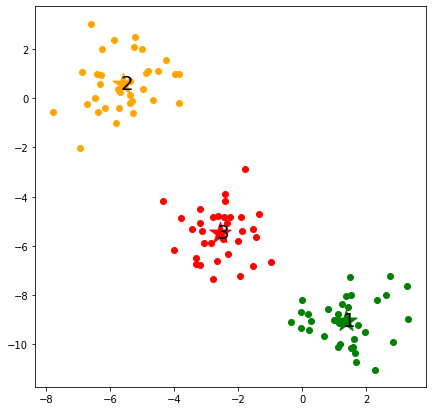

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [ ]:
dists = 0
for i in clusters:
    for x in clusters[i]:
        dists += np.linalg.norm(x - centroids[i]) ** 2

dists

182.88763537399484

In [ ]:
km = sk_KMeans(n_clusters=3).fit(X)
km.inertia_

182.88763537399484

### Цикл для обучения на разном кол-ве кластеров

In [ ]:
inertias = []
for i in range(1, 7):
    centroids, clusters = KMeans(X, k=i)
    dists = 0
    for i in clusters:
        for x in clusters[i]:
            dists += np.linalg.norm(x - centroids[i]) ** 2

    inertias.append(dists)

stopping at iter 1
stopping at iter 1
stopping at iter 2
stopping at iter 8
stopping at iter 2
stopping at iter 2


In [ ]:
inertias

[2588.7486419573993,
 649.4333696428022,
 182.88763537399484,
 154.3118712536231,
 140.48669823056807,
 117.49339708989534]

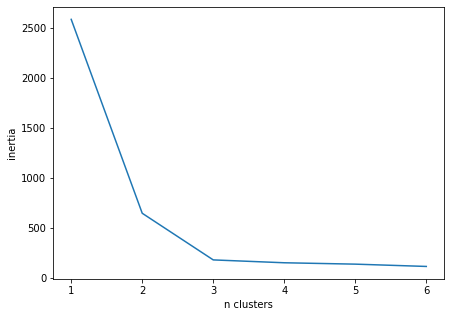

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(inertias)
plt.xticks(np.arange(0, 6), np.arange(1, 7))
plt.xlabel('n clusters')
plt.ylabel('inertia');

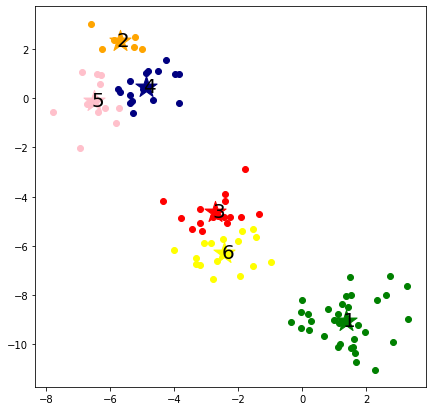

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

#### Подбираем оптимальное количество

Будем на каждом шаге смотреть изменение inertia, и в тот момент, когда оно резко замедлится (относительно предыдущего изменения) мы и остановимся

Считаем изменения
$${inertia_{k+1}-inertia_{k}}$$

In [ ]:
diff = np.diff(inertias)

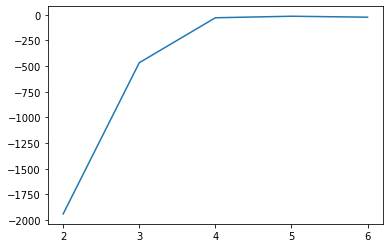

In [ ]:
plt.plot(diff)
plt.xticks(np.arange(0, 5), np.arange(2, 7));

Теперь можно найти оптимальное число кластеров по этой формуле:
$$k_{opt} = argmin(\frac{inertia_{k+1}-inertia_{k}}{inertia_{k}-inertia_{k-1}})$$

In [ ]:
diff[1:]

array([-466.54573427,  -28.57576412,  -13.82517302,  -22.99330114])

In [ ]:
diff[:-1]

array([-1939.31527231,  -466.54573427,   -28.57576412,   -13.82517302])

In [ ]:
diff_r = diff[1:] / diff[:-1]

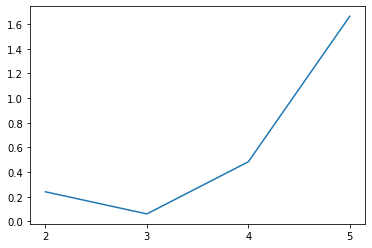

In [ ]:
plt.plot(diff_r)
plt.xticks(np.arange(0, 4), np.arange(2, 6));

In [ ]:
centroids, clusters = KMeans(X, k=3)

stopping at iter 2


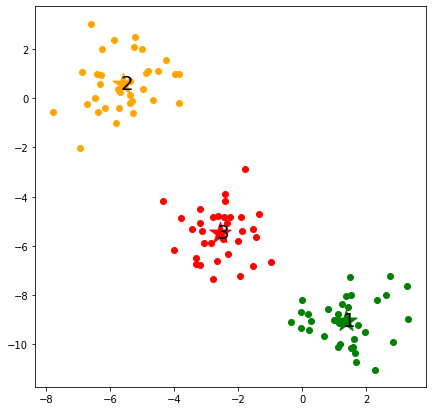

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

### Посложнее данные

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=300, random_state=10, n_informative=2, n_redundant=0)

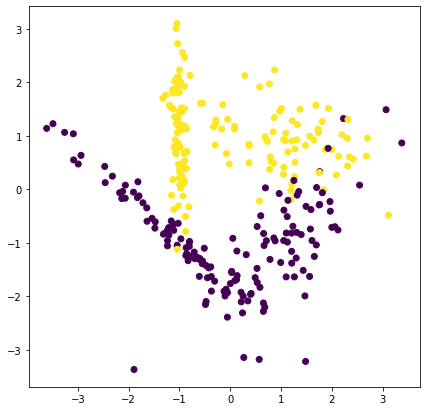

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y);

In [ ]:
inertias = []
for i in range(1, 7):
    centroids, clusters = KMeans(X, k=i)
    dists = 0
    for i in clusters:
        for x in clusters[i]:
            dists += np.linalg.norm(x - centroids[i]) ** 2

    inertias.append(dists)

stopping at iter 1


In [ ]:
inertias

[6281.391177646002,
 5925.287079888724,
 5542.179623547259,
 5386.471555837043,
 5285.379165902779,
 5179.179598195613]

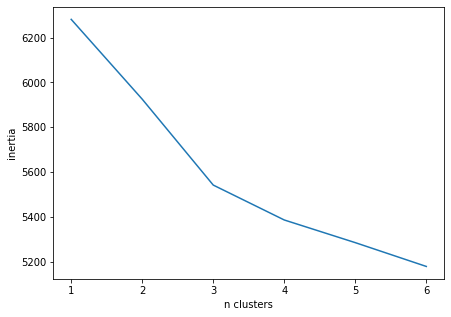

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(inertias)
plt.xlabel('n clusters')
plt.ylabel('inertia')
plt.xticks(np.arange(0, 6), np.arange(1, 7));

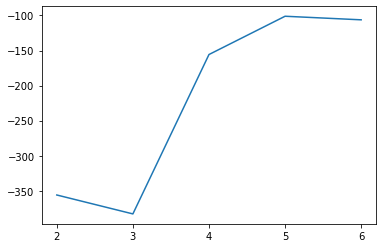

In [ ]:
diff = np.diff(inertias)

plt.plot(diff)
plt.xticks(np.arange(0, 5), np.arange(2, 7));

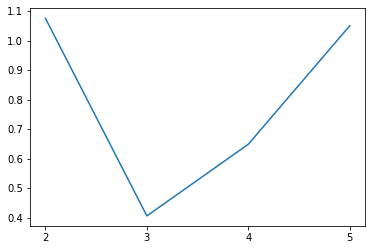

In [ ]:
diff_r = diff[1:] / diff[:-1]

plt.plot(diff_r)
plt.xticks(np.arange(0, 4), np.arange(2, 6));

In [ ]:
centroids, clusters = KMeans(X, k=3, num_iter=20, seed=10)

stopping at iter 15


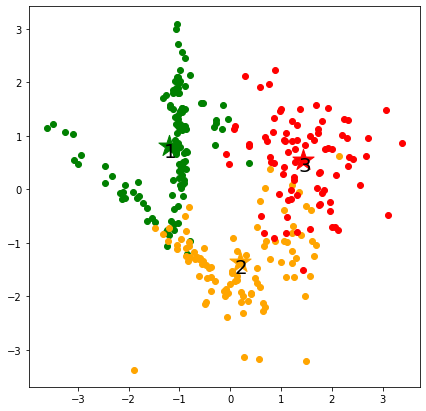

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

## Итоги:

Вот мы и разобрались, как устроен метод локтя, а именно
1. Рассчитали внутрикластерную дисперсию
2. Получили значения inertia из KMeans в sklearn
3. Выбрали оптимальное количество кластеров с помощью метода локтя